In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Numerical integration 1:

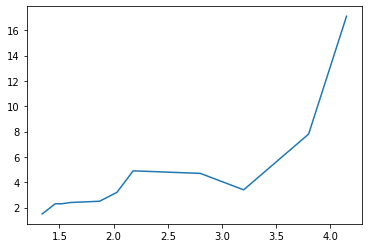

In [146]:
x=[1.34,1.46,1.52,1.6,1.87,2.03,2.18,2.8,3.2,3.8,4.15]
fx=[1.5,2.3,2.3,2.4,2.5,3.2,4.9,4.7,3.4,7.8,17.1]
x=np.array(x)
fx=np.array(fx)
plt.plot(x,fx)


In [147]:
s=np.sum(([x[1:]-x[:-1]])*(fx[1:]+fx[:-1])/2)
res=0
n=len(x)
for i in range (n-1):
    res+=(0.5)*((x[i+1]-x[i])*(fx[i+1]+fx[i]))
# print(s)
print(res)

14.592500000000005


# Numerical Integration 2

0.6666679382324219
1.9999984312683834
1.570201613064376


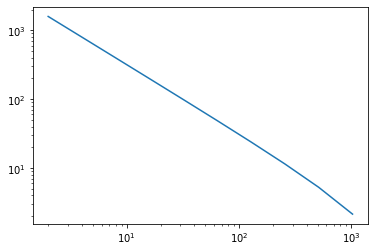

In [148]:
#USING trapezoidal rule

def f1(x):
    return x**2
def f2(x):
    return np.sin(x)
def f3(x):
    return ((np.sin(x))/x)**2

def trap(f,a,b,N):
    ans = 0
    delx=(b-a)/N
    ans+=f(a)+f(b)
    for i in range(1,N):
        tempx=a+i*delx
        ans=ans+(2*f(tempx))
    return ans*delx/2
print(trap(f1,-1,1,1024))
print(trap(f2,0,np.pi,1024))
print(trap(f3,0.0001,1000,1024))


#error plot

ana1=2/3
ana2=2
ana3=np.pi/2

e=np.zeros(10)
NVA=[]
for i in range(10):
    NVA.append(2**(i+1))
NVAL=np.array(NVA)
yN=np.zeros(10)
for i in range(10):
    yN[i]=trap(f3,0.0001,10000,NVAL[i])#change here
yANA=np.zeros(10)
for i in range(10):
    yANA[i]=ana3#change here
for i in range(10):
    e[i]=abs(yN[i]-yANA[i])/abs(yANA[i])
plt.loglog(NVAL,e)

0.6666666666666666
2.0000000000009828
1.5701953464048342


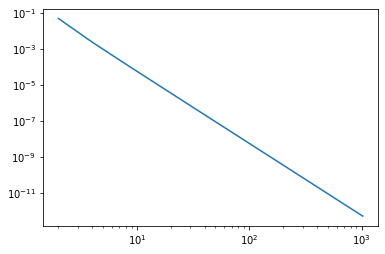

In [149]:
# USING simpson rule

def f1(x):
    return x**2
def f2(x):
    return np.sin(x)
def f3(x):
    return ((np.sin(x))/x)**2

def simp(f,a,b,N):
    res=f(a)+f(b)
    deltax=(b-a)/N
    for i in range(1,N):
        s=a+i*deltax
        if i%2:
            res+=4*f(s)
        else:
            res+=2*f(s)
    return res*deltax*(1/3)
print(simp(f1,-1,1,1024))
print(simp(f2,0,np.pi,1024))
print(simp(f3,0.0001,1000,1024))

# error plot

ana1=2/3
ana2=2
ana3=np.pi/2
#print(ana1)
e=np.zeros(10)
NVA=[]
for i in range(10):
    NVA.append(2**(i+1))
NVAL=np.array(NVA)
yN=np.zeros(10)
for i in range(10):
    yN[i]=simp(f2,0,np.pi,NVAL[i])#change here f,a,b
yANA=np.zeros(10)
for i in range(10):
    yANA[i]=ana2#change here ana value
for i in range(10):
    e[i]=abs(yN[i]-yANA[i])/abs(yANA[i])
plt.loglog(NVAL,e)

# Numerical Integration 4

In [197]:
def sh(z):
    return (1/np.pi)*1/((1-z**2)**0.5)
def Tp(a,b,n):
    delx=(b-a)/n
    v1=sh(a)
    v2=sh(b)
    ans=v1+v2
    for i in range(1,n):
        y=a+i*delx
        ans=ans+(2*sh(y))
    return ((delx/2)*ans)

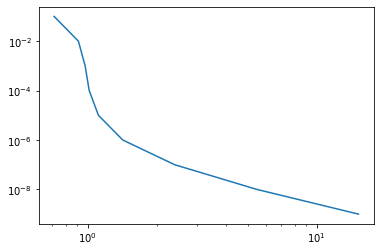

In [227]:
er=[]
for i in range(1,10):
    er.append(10**(-i))
er=np.array(er)
timper=[]
for i in er:
    timper.append(Tp(-1+i,1-i,1000))
#     print(Tp(-1+i,1-i,1000))
plt.loglog(timper,er)

In [226]:
resTp=Tp(-1+er[3],1-er[3],1024)
#Choosing er[3] i.e. 10^-4 we get a good approximation of trapezoidal rule i.e. a value close to 1 as 
#analytical value is close to 1
resTp

1.0135984908798374